In [ ]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 10)

In [ ]:
sns.set_theme(style='darkgrid', palette='bright')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)

In [ ]:
!gdown --id 19ZnVu6agdLJdUI1fpfJXkwKZgt-cT8hR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19ZnVu6agdLJdUI1fpfJXkwKZgt-cT8hR
To: /content/data_test.csv
100% 1.47M/1.47M [00:00<00:00, 162MB/s]


In [ ]:
df = pd.read_csv('/content/data_test.csv')
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before


In [ ]:
df.tail()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
19995,108834,посох,булава,лук,посох,26.37,after
19996,119941,посох,меч,лук,посох,23.73,after
19997,112911,топор,посох,булава,топор,27.73,after
19998,111684,меч,топор,посох,меч,24.20,after
19999,103437,лук,лук,булава,булава,22.83,after


In [ ]:
df['balance_mark'].value_counts()

before    10000
after     10000
Name: balance_mark, dtype: int64

In [ ]:
df.shape

(20000, 7)

Всего мы имеем 20000 боёв из которых 10000 были проведены до изменения баланса оружия, и 10000 после. Давайте посмотрим какие виды оружия использовались в боях. Может случиться так, что какой-то из видов оружие не будет представлен в одном из столбцов, поэтому, чтобы узнать все виды используемого оружия, нам нужно посмотреть на все столбцы unit_1-4.

In [ ]:
print(df['unit_1'].unique())
print(df['unit_2'].unique())
print(df['unit_3'].unique())
print(df['unit_4'].unique())

['топор' 'посох' 'меч' 'булава' 'лук']
['лук' 'посох' 'меч' 'булава' 'топор']
['булава' 'лук' 'меч' 'топор' 'посох']
['лук' 'топор' 'булава' 'посох' 'меч']


In [ ]:
weapons = ['топор', 'посох', 'меч', 'булава', 'лук']

В боях использовались всего 5 видов оружия. Нетрудно посчитать количество уникальных сочетаний оружий, учитывая что они могут повторяться, но порядок не важен. Это число сочетаний с повторениями из 5 по 4 = 70. 

In [ ]:
weapon_combinations = list(itertools.combinations_with_replacement(weapons, r=4))
weapon_combinations[:6]

[('топор', 'топор', 'топор', 'топор'),
 ('топор', 'топор', 'топор', 'посох'),
 ('топор', 'топор', 'топор', 'меч'),
 ('топор', 'топор', 'топор', 'булава'),
 ('топор', 'топор', 'топор', 'лук'),
 ('топор', 'топор', 'посох', 'посох')]

In [ ]:
len(weapon_combinations)

70

Для удобства добавим новый столбец, который является соединением четырех столбцов с оружиями.

In [ ]:
df['weapons'] = list(zip(df['unit_1'], df['unit_2'], df['unit_3'], df['unit_4']))

In [ ]:
df.head()

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark,weapons
0,103921,топор,лук,булава,лук,17.35,before,"(топор, лук, булава, лук)"
1,117214,посох,посох,лук,лук,21.84,before,"(посох, посох, лук, лук)"
2,115502,меч,посох,булава,топор,16.00,before,"(меч, посох, булава, топор)"
3,110102,булава,лук,лук,булава,17.22,before,"(булава, лук, лук, булава)"
4,104989,меч,посох,булава,посох,19.20,before,"(меч, посох, булава, посох)"


Разделим наш датасет на два датасета: до изменения баланса и после. И проанализируем повлияло ли изменение баланса на длительность боя.

In [ ]:
before = df[df['balance_mark'] == 'before']
after = df[df['balance_mark'] == 'after']

In [ ]:
mean_before = before['len'].mean()
mean_after = after['len'].mean()
print('Mean battle duration before: {:.6f}, after: {:.6f}'.format(mean_before, mean_after))

Mean battle duration before: 19.973604, after: 24.123115


In [ ]:
var_before = before['len'].var()
var_after = after['len'].var()
print('Variance of battle duration before: {:.6f}, after: {:.6f}'.format(var_before, var_after))

Variance of battle duration before: 8.267487, after: 14.435284


Как мы видим, выборочное среднее и выборочная диспесия до и после довольно сильно различаются. Это говорит нам о том, что изменение баланса оружий действительно повлияло на длительность боя. Для того чтобы понять как именно изменение баланса повлияло на длительность боя, давайте взглянем на графики.

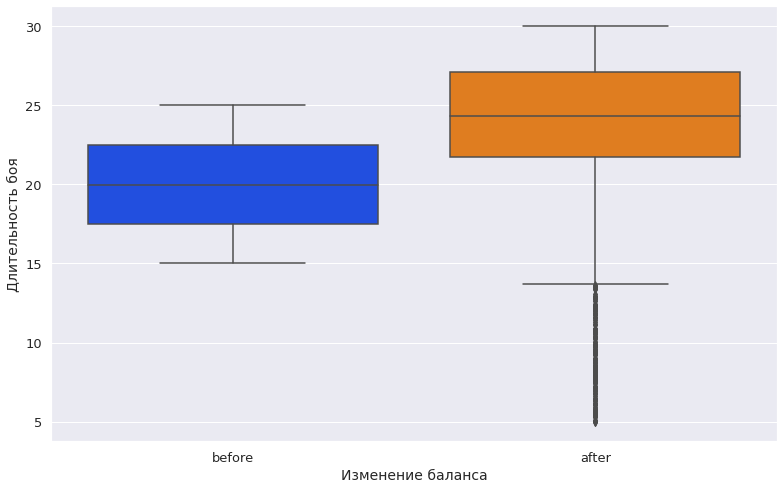

In [ ]:
plt.figure(figsize=(13, 8))
sns.boxplot(x='balance_mark', y='len', data=df, palette='bright')
plt.xlabel('Изменение баланса')
plt.ylabel('Длительность боя');

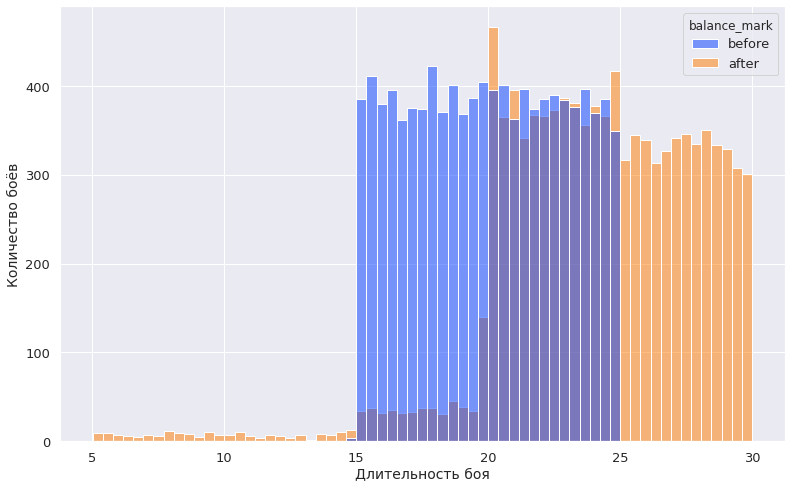

In [ ]:
plt.figure(figsize=(13, 8))
sns.histplot(x='len', data=df, hue='balance_mark', palette='bright')
plt.xlabel('Длительность боя')
plt.ylabel('Количество боёв');

Как видно из графиков выше, длительность боя в среднем увеличилась на 5 секунд. Это может означать, что все характеристики оружий были занижены, и, соответственно, бой стал длиться дольше. Однако вместе с тем появилось много "выбросов", где длительность боя составила от 5 до 15 секунд, чего не было до изменения баланса. Вполне возможно это связано с тем, что игроки нашли выигрывающую комбинацию оружий, которая сейчас позволяет закончить бой быстрее.



Давайте взглянем на среднюю продолжительность боя по каждой комбинации оружий до и после изменения баланса.

In [ ]:
mean_battle_duration_for_WC_before = [] # WC - weapon combination
mean_battle_duration_for_WC_after = []

for unique_weapon_combination in weapon_combinations:

# -----Before----------------------
    sum = 0
    count = 0
    for i, set_of_weapons in enumerate(before['weapons']):
        if sorted(unique_weapon_combination) == sorted(set_of_weapons):
            sum += before['len'][i]
            count += 1
    sum = sum / count
    mean_battle_duration_for_WC_before.append((unique_weapon_combination, sum, count))
# --------------------------------

# -----After----------------------
    sum = 0
    count = 0
    for i, set_of_weapons in enumerate(after['weapons']):
        if sorted(unique_weapon_combination) == sorted(set_of_weapons):
            sum += after['len'][10000 + i]
            count += 1
    sum = sum / count
    mean_battle_duration_for_WC_after.append((unique_weapon_combination, sum, count))
# --------------------------------

In [ ]:
mean_before_df = pd.DataFrame(data=mean_battle_duration_for_WC_before, columns=['weapons', 'mean_len', 'battles_played'])
mean_after_df = pd.DataFrame(data=mean_battle_duration_for_WC_after, columns=['weapons', 'mean_len', 'battles_played'])

In [ ]:
mean_after_df.head()

,weapons,mean_len,battles_played
0,"(топор, топор, топор, топор)",19.969167,12
1,"(топор, топор, топор, посох)",24.732090,67
2,"(топор, топор, топор, меч)",20.576500,60
3,"(топор, топор, топор, булава)",20.086825,63
4,"(топор, топор, топор, лук)",24.986615,65


In [ ]:
len(mean_before_df), len(mean_after_df)

(70, 70)

In [ ]:
mean_df = pd.merge(mean_before_df, mean_after_df, on='weapons', suffixes=('_before', '_after'))
mean_df

,weapons,mean_len_before,battles_played_before,mean_len_after,battles_played_after
0,"(топор, топор, топор, топор)",18.891667,12,19.969167,12
1,"(топор, топор, топор, посох)",20.026418,67,24.732090,67
2,"(топор, топор, топор, меч)",20.082143,84,20.576500,60
3,"(топор, топор, топор, булава)",20.389500,60,20.086825,63
4,"(топор, топор, топор, лук)",19.963235,68,24.986615,65
...,...,...,...,...,...
65,"(булава, булава, булава, булава)",18.518125,16,19.811667,18
66,"(булава, булава, булава, лук)",20.488983,59,24.925000,72
67,"(булава, булава, лук, лук)",20.045378,119,24.782453,106
68,"(булава, лук, лук, лук)",20.373846,65,25.040000,69


In [ ]:
mean_df['len_differences'] = mean_df.apply(lambda row: row.mean_len_after - row.mean_len_before, axis=1)
mean_df['battle_differences'] = mean_df.apply(lambda row: row.battles_played_after - row.battles_played_before, axis=1)
mean_df

,weapons,mean_len_before,battles_played_before,mean_len_after,battles_played_after,len_differences,battle_differences
0,"(топор, топор, топор, топор)",18.891667,12,19.969167,12,1.077500,0
1,"(топор, топор, топор, посох)",20.026418,67,24.732090,67,4.705672,0
2,"(топор, топор, топор, меч)",20.082143,84,20.576500,60,0.494357,-24
3,"(топор, топор, топор, булава)",20.389500,60,20.086825,63,-0.302675,3
4,"(топор, топор, топор, лук)",19.963235,68,24.986615,65,5.023380,-3
...,...,...,...,...,...,...,...
65,"(булава, булава, булава, булава)",18.518125,16,19.811667,18,1.293542,2
66,"(булава, булава, булава, лук)",20.488983,59,24.925000,72,4.436017,13
67,"(булава, булава, лук, лук)",20.045378,119,24.782453,106,4.737075,-13
68,"(булава, лук, лук, лук)",20.373846,65,25.040000,69,4.666154,4


Мы получили датасет, в котором по каждой комбинации оружий можно узнать средную длительность боя до и после изменений, а также количество боёв до и после(вдруг какая-то комбинация раньше была популярна, а сейчас стала никому не нужна). 

In [ ]:
mean_df.sort_values('battles_played_before', ascending=False)

,weapons,mean_len_before,battles_played_before,mean_len_after,battles_played_after,len_differences,battle_differences
20,"(топор, посох, меч, булава)",20.010897,390,24.902734,384,4.891837,-6
21,"(топор, посох, меч, лук)",19.976945,383,25.062861,367,5.085916,-16
29,"(топор, меч, булава, лук)",20.060654,382,24.824011,379,4.763356,-3
49,"(посох, меч, булава, лук)",19.748333,378,24.979233,365,5.230900,-13
23,"(топор, посох, булава, лук)",20.114727,366,25.000980,408,4.886254,42
...,...,...,...,...,...,...,...
55,"(меч, меч, меч, меч)",18.739200,25,20.579500,20,1.840300,-5
35,"(посох, посох, посох, посох)",20.571250,16,24.978182,11,4.406932,-5
69,"(лук, лук, лук, лук)",21.615625,16,24.404286,21,2.788661,5
65,"(булава, булава, булава, булава)",18.518125,16,19.811667,18,1.293542,2


In [ ]:
mean_df.sort_values('battles_played_after', ascending=False)

,weapons,mean_len_before,battles_played_before,mean_len_after,battles_played_after,len_differences,battle_differences
23,"(топор, посох, булава, лук)",20.114727,366,25.000980,408,4.886254,42
20,"(топор, посох, меч, булава)",20.010897,390,24.902734,384,4.891837,-6
29,"(топор, меч, булава, лук)",20.060654,382,24.824011,379,4.763356,-3
21,"(топор, посох, меч, лук)",19.976945,383,25.062861,367,5.085916,-16
49,"(посох, меч, булава, лук)",19.748333,378,24.979233,365,5.230900,-13
...,...,...,...,...,...,...,...
69,"(лук, лук, лук, лук)",21.615625,16,24.404286,21,2.788661,5
55,"(меч, меч, меч, меч)",18.739200,25,20.579500,20,1.840300,-5
65,"(булава, булава, булава, булава)",18.518125,16,19.811667,18,1.293542,2
0,"(топор, топор, топор, топор)",18.891667,12,19.969167,12,1.077500,0


Как видно из двух таблиц выше, самые часто играемые сочетания оружий не изменились после ребаланса, чаще всего игроки выбирают комбинацию без повторений. Также не изменились самые редко играемые сочетания оружий. Реже всего игрались в бою полностью сочетания из полностью одинаковых оружий, будь то лук, посох, топор, меч или булава.

Имеет смысл сказать, что ребаланс не повлиял на выбор комбинации оружий. Давайте сейчас посмотрим, как изменилось среднее время боя по каждому оружию после ребаланса.

In [ ]:
mean_df.sort_values('mean_len_before', ascending=False) # Среднее время боя ДО ребаланса (по убыванию)

,weapons,mean_len_before,battles_played_before,mean_len_after,battles_played_after,len_differences,battle_differences
69,"(лук, лук, лук, лук)",21.615625,16,24.404286,21,2.788661,5
35,"(посох, посох, посох, посох)",20.571250,16,24.978182,11,4.406932,-5
57,"(меч, меч, меч, лук)",20.532963,54,25.460000,68,4.927037,14
66,"(булава, булава, булава, лук)",20.488983,59,24.925000,72,4.436017,13
27,"(топор, меч, меч, лук)",20.454369,206,24.987534,219,4.533165,13
...,...,...,...,...,...,...,...
34,"(топор, лук, лук, лук)",19.593182,66,24.480882,68,4.887701,2
16,"(топор, посох, посох, меч)",19.415372,188,25.026480,196,5.611107,8
0,"(топор, топор, топор, топор)",18.891667,12,19.969167,12,1.077500,0
55,"(меч, меч, меч, меч)",18.739200,25,20.579500,20,1.840300,-5


In [ ]:
mean_df.sort_values('mean_len_after', ascending=False) # Среднее время боя ПОСЛЕ ребаланса (по убыванию)

,weapons,mean_len_before,battles_played_before,mean_len_after,battles_played_after,len_differences,battle_differences
57,"(меч, меч, меч, лук)",20.532963,54,25.460000,68,4.927037,14
39,"(посох, посох, меч, меч)",19.658065,93,25.445825,103,5.787761,10
38,"(посох, посох, посох, лук)",19.738246,57,25.369692,65,5.631447,8
64,"(меч, лук, лук, лук)",20.206986,73,25.311286,70,5.104299,-3
30,"(топор, меч, лук, лук)",20.063011,186,25.302512,207,5.239501,21
...,...,...,...,...,...,...,...
9,"(топор, топор, меч, меч)",19.926022,93,19.954886,88,0.028865,-5
31,"(топор, булава, булава, булава)",20.161389,72,19.830441,68,-0.330948,-4
65,"(булава, булава, булава, булава)",18.518125,16,19.811667,18,1.293542,2
56,"(меч, меч, меч, булава)",19.983000,70,19.760563,71,-0.222437,1


До изменения баланса оружий дольше всего игралась комбинация (лук, лук, лук, лук) и (посох, посох, посох, посох), а уже после ребаланса первое место по длительности заняла комбинация (меч, меч, меч, лук). Но интереснее всего обстоит дело с самыми быстрыми боями. Если раньше быстрее всего игрались комбинации (булава, булава, булава, булава); (меч, меч, меч, меч) и (топор, топор, топор, топор), что объясняется быстрой "зарубой в рукопашную", то после ребаланса почему-то быстрее всего начала играться комбинация (топор, меч, булава, булава), причем кратно быстрее. Раньше такая же комбинация игралась за 20 секунд, а сейчас чтобы закончить с ней бой требуется меньше 10 секунд. Вероятно это и есть та самая выигрывающая комбинация. 

Таким образом мы выяснили, что изменение баланса оружий действительно повлияло на длительность боя, предположили почему это произошло, а также нашли комбинацию оружий, которая после ребаланса начала играться намного быстрее чем до.  